In [7]:
from pepbenchmark.single_pred.base_dataset import SingleTaskDatasetManager,OFFICIAL_FEATURE_TYPES
from pepbenchmark.utils.logging import disable_logging,enable_logging

# 读取数据集

In [8]:
# when you want to disable logging, uncomment the line below
enable_logging()
# disable_logging()

In [9]:
# Example usage of SingleTaskDatasetManager
# 导入数据集AV_APML 并加载fasta和label特征
# 导入的特征必须在OFFICIAL_FEATURE_TYPES中
# 默认情况下，数据集会被下载到默认目录 DATA_DIR

dataset = SingleTaskDatasetManager(
    dataset_name="AV_APML",
    official_feature_names=["fasta","label"],
    force_download=False,
)
# 打印数据集的长度

print(len(dataset))  
# 支持的所有官方特征
print("Supported official features:", OFFICIAL_FEATURE_TYPES)


print(dataset[0]) # 打印数据集的第一个样本

[2025-07-07 05:14:34,537][INFO][pepbenchmark] Set official feature: fasta successfully
[2025-07-07 05:14:34,539][INFO][pepbenchmark] Set official feature: label successfully


4796
Supported official features: {'mmseqs2_split', 'smiles', 'biln', 'fasta', 'fasta_onehot', 'ecfp', 'fasta_esm2_150', 'random_split', 'helm', 'label', 'graph'}
{'official_fasta': 'SCVSQSTGQIQCKVFDSLLNLSSTLQAT', 'official_label': 1}


In [10]:
# 继续添加新的官方特征,这等价于初始化SingleTaskDatasetManager时在official_feature_names中指定
dataset.set_official_feature(feature_name="smiles")
print(dataset[0])
# 添加已经存在的特征
dataset.set_official_feature(feature_name="fasta")
print(dataset[0])
# 添加不存在于官方的用户自定义特征;feature_data的长度和顺序需要与已加载特征匹配
# 模拟用户自定义特征数据
user_feature_data = list(range(len(dataset))) 
dataset.set_user_feature(feature_name="custom_feature", feature_data=user_feature_data)
print(dataset[0])
# 打印所有特征名称；官方特征和用户自定义特征会以“official_”和“user_”前缀区分
print(dataset.get_feature_names())  
# 删除特征
dataset.remove_official_feature(feature_name="smiles")
dataset.remove_user_feature(feature_name="custom_feature")
print(dataset.get_feature_names())  # 打印所有特征名称

[2025-07-07 05:14:34,868][INFO][pepbenchmark] Set official feature: smiles successfully
[2025-07-07 05:14:34,868][INFO][pepbenchmark] Feature fasta already exists in dataset
[2025-07-07 05:14:34,869][INFO][pepbenchmark] Set user feature: custom_feature successfully
[2025-07-07 05:14:34,869][INFO][pepbenchmark] Removed official feature: smiles
[2025-07-07 05:14:34,869][INFO][pepbenchmark] Removed user feature: custom_feature


{'official_fasta': 'SCVSQSTGQIQCKVFDSLLNLSSTLQAT', 'official_label': 1, 'official_smiles': 'CC[C@H](C)[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)CNC(=O)[C@@H](NC(=O)[C@H](CO)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CO)NC(=O)[C@@H](NC(=O)[C@H](CS)NC(=O)[C@@H](N)CO)C(C)C)[C@@H](C)O)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CS)C(=O)N[C@@H](CCCCN)C(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CO)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CO)C(=O)N[C@@H](CO)C(=O)N[C@H](C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](C)C(=O)N[C@H](C(=O)O)[C@@H](C)O)[C@@H](C)O)C(C)C'}
{'official_fasta': 'SCVSQSTGQIQCKVFDSLLNLSSTLQAT', 'official_label': 1, 'official_smiles': 'CC[C@H](C)[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)CNC(=O)[C@@H](NC(=O)[C@H](CO)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CO)NC(=O)[C@@H](NC(=O)[C@H](CS)NC(=O)[C@@H](N)CO)C(C)C)[C@@H](C)O)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CS)C(=O)N[C@@H](CCCCN)C(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CC(=O)O)C

## 使用 convert.py 中的转换器转换特征
我们在官方特征中尽可能提供了常用的特征，但有时你可能需要自定义特征转换。现在可以直接使用 convert.py 中的转换器类来将序列转换为特征向量。
这些转换器支持单个输入和批处理，经过转化后的特征可以使用 set_user_feature 方法添加到数据集中。

In [11]:
import pandas as pd
from pepbenchmark.pep_utils.convert import Fasta2Helm, Fasta2Smiles, Smiles2FP
from pepbenchmark.splitter.random_spliter import RandomSplitter

# 获取fasta特征
fasta = dataset.get_official_feature("fasta")

# 直接使用convert.py中的转换器类
fasta2helm = Fasta2Helm()
fasta2smiles = Fasta2Smiles()
smiles2fp = Smiles2FP(fp_type="Morgan", radius=3,nBits=2048)

# 进行转换 - 这些转换器现在支持批处理
helm = fasta2helm(fasta)
smiles = fasta2smiles(fasta)
fp = smiles2fp(smiles)

# 设置转换后的特征
dataset.set_user_feature("helm", helm)
dataset.set_user_feature("fingerprint", fp)




[2025-07-07 05:14:36,292][INFO][pepbenchmark] Feature fasta already loaded, skipping download
Processing batch: 100%|██████████| 4796/4796 [00:05<00:00, 799.41it/s] 
[2025-07-07 05:14:47,833][INFO][pepbenchmark] Set user feature: helm successfully
[2025-07-07 05:14:47,834][INFO][pepbenchmark] Set user feature: fingerprint successfully


In [12]:
print(dataset.get_feature_names())  # 打印所有特征名称
print(dataset[1])  # 打印第一个样本

['official_fasta', 'official_label', 'user_helm', 'user_fingerprint']
{'official_fasta': 'GSAQPYKQLHKVVNWDPYG', 'official_label': 0, 'user_helm': 'PEPTIDE1{G.S.A.Q.P.Y.K.Q.L.H.K.V.V.N.W.D.P.Y.G}$$$V2.0', 'user_fingerprint': array([0, 1, 0, ..., 0, 0, 0])}


# 设置划分方式
我们提供两种划分方式：
第一种是




In [13]:
dataset.set_official_split_indices(split_type="random_split",fold_seed=0)
for k,v in dataset.get_split_indices().items():
    print(f"Split {k}: {len(v)} samples")
print(dataset.get_split_indices())

[2025-07-07 05:14:50,153][INFO][pepbenchmark] Set official split ===random_split=== with seed ====0=== successfully


Split train: 3836 samples
Split valid: 479 samples
Split test: 481 samples
{'train': [561, 893, 1684, 705, 1873, 2697, 3018, 3308, 733, 33, 1322, 3048, 1756, 2925, 2702, 1374, 2629, 598, 179, 1261, 4263, 2966, 3469, 4275, 3426, 538, 1505, 4478, 4270, 831, 79, 429, 3174, 1842, 3575, 765, 1135, 1972, 1056, 1421, 501, 227, 3860, 4512, 1551, 2509, 1351, 1144, 2527, 4187, 1973, 1831, 3634, 8, 23, 764, 2351, 859, 742, 3781, 1437, 2307, 322, 3362, 2902, 4492, 577, 3395, 670, 1027, 1522, 2342, 1024, 4606, 4722, 1812, 964, 1665, 2517, 3084, 4159, 491, 534, 4664, 3270, 65, 4400, 2673, 763, 1694, 3754, 3893, 3333, 1718, 199, 3366, 1614, 2268, 1610, 2316, 1728, 1514, 4324, 4220, 3718, 1784, 3728, 1438, 4024, 3878, 3586, 4387, 879, 3355, 287, 1391, 3269, 915, 4198, 3492, 2833, 969, 2407, 3423, 584, 144, 3686, 290, 1047, 4556, 841, 2726, 4411, 2900, 4086, 2361, 1532, 721, 3591, 132, 2805, 838, 677, 3855, 2249, 2651, 296, 4535, 4104, 2962, 4382, 1392, 3337, 3189, 2989, 3061, 621, 3508, 3958, 681, 364

In [14]:
spliter = RandomSplitter()
split_indices = spliter.get_split_indices(fasta,
                                        n_splits=5,
                                        frac_train=0.8,
                                        frac_valid=0.1,
                                        frac_test=0.1,
                                        seed=42,
                                    )
for k,v in split_indices.items():
    print(f"Split {k}: {len(v)} samples")
dataset.set_user_split_indices(split_indices)

print(dataset.get_split_indices())  

[2025-07-07 05:14:50,712][INFO][pepbenchmark] Set user-defined split indices successfully


Split train: 3836 samples
Split valid: 479 samples
Split test: 481 samples
{'train': array([ 561,  893, 1684, ..., 3954, 2935, 3204]), 'valid': array([1347, 3055,  355, 4472, 3531, 2730,  827, 1639, 3694, 3040,  984,
       3281, 4768, 3934, 2188, 4429, 2443,  362, 2349,  345, 3891, 4425,
        711, 3205, 3912, 4601, 3897, 3325,   10, 1683, 2116, 4546, 1834,
        793, 3363, 4743, 2802, 2674,   94, 3907,  129, 3756, 2891, 2371,
       2094, 4718, 3332, 4255, 3228, 4719, 3767, 2995, 2263, 1900, 2275,
        814, 3230, 1932, 2853, 4046, 2912, 1865, 1658,  516, 3593, 1857,
       2645, 2243, 1277, 2336,  950, 3482, 3044, 3068, 1120, 4273, 2597,
       2204,  419,  922, 1254,  477, 2035, 4100, 1692, 4133, 4127, 3571,
       1471, 2601, 1202, 2438, 2626, 1669, 4624, 1970, 3110, 2151, 3687,
        820, 1997, 4694, 3054, 1248, 2192, 2712,  992, 2190, 4480, 1046,
       1888, 2469, 3708, 3762, 2847, 3597,  615, 1318, 1863, 2343, 2449,
       2136, 1065, 1772, 4757,  131, 4059, 3481,   77

In [15]:
from pepbenchmark.evaluator import evaluate_classification
from sklearn.ensemble import RandomForestClassifier


# dataset.set_official_split_indices(split_type="random_split",fold_seed=0)
dataset.set_official_split_indices(split_type="mmseqs2_split",fold_seed=0)
train_features, valid_features, test_features = dataset.get_train_val_test_features(format="dict")
model = RandomForestClassifier(random_state=42)
# 训练模型
model.fit(X=train_features["user_fingerprint"], y=train_features["official_label"])

for name, X, y in [
    ("Train", train_features["user_fingerprint"], train_features["official_label"]),
    ("Valid", valid_features["user_fingerprint"], valid_features["official_label"]),
    ("Test", test_features["user_fingerprint"], test_features["official_label"]),
]:
    preds = model.predict(X)
    probs = (
        model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else None
    )
    metrics = evaluate_classification(y_true=y, y_pred=preds, y_score=probs)
    print(f"{name} set metrics (using evaluate_classification): {metrics}")

[2025-07-07 05:14:51,594][INFO][pepbenchmark] Set official split ===mmseqs2_split=== with seed ====0=== successfully


Train set metrics (using evaluate_classification): {'accuracy': 0.9994786235662148, 'balanced-accuracy': 0.9994599122850244, 'precision': 0.9995604395604396, 'recall': 0.9995604395604396, 'specificity': 0.9993593850096092, 'f1': 0.9995604395604396, 'micro-f1': 0.9994786235662148, 'macro-f1': 0.9994599122850244, 'weighted-f1': 0.9994786235662148, 'mcc': 0.9989198245700488, 'kappa': 0.9989198245700488, 'g-mean': 0.9994599072294273, 'roc-auc': 0.9999994368219864, 'avg-roc-auc': 0.9999994368219864, 'pr-auc': 0.9999994206992774, 'brier-score': 0.020196150347421733, 'log-loss': 0.1317115877109765}
Valid set metrics (using evaluate_classification): {'accuracy': 0.8851774530271399, 'balanced-accuracy': 0.8512766945218199, 'precision': 0.9269662921348315, 'recall': 0.9192200557103064, 'specificity': 0.7833333333333333, 'f1': 0.9230769230769231, 'micro-f1': 0.8851774530271399, 'macro-f1': 0.8483697372586262, 'weighted-f1': 0.8856453477191125, 'mcc': 0.6968505156107972, 'kappa': 0.696755182614501

## Redundancy filter and homo-based split

In [22]:
import pandas as pd
from pepbenchmark.single_pred.base_dataset import SingleTaskDatasetManager
from pepbenchmark.splitter.homo_spliter import MMseqs2Spliter
from pepbenchmark.pep_utils.redundancy import RedundancyFilter
from pepbenchmark.utils.logging import disable_logging,enable_logging

enable_logging()

fasta = dataset.get_official_feature("fasta")
label = dataset.get_official_feature("label")
print(f"Original dataset length: {len(fasta)}")

# 由于mmseqs2安装问题，暂时跳过redundancy filtering
# 如果需要redundancy filtering，请确保mmseqs2正确安装
print("Skipping redundancy filtering due to mmseqs2 installation issues...")

# 直接使用原始数据进行分割
# 如果mmseqs2可用，也可以尝试使用MMseqs2Spliter
# 这里改用RandomSplitter作为备选方案
from pepbenchmark.splitter.random_spliter import RandomSplitter

spliter = RandomSplitter()
split_indices = spliter.get_split_indices(fasta,
                                        n_splits=5,
                                        frac_train=0.8,
                                        frac_valid=0.1,
                                        frac_test=0.1,
                                        seed=42,
                                    )
print("Split indices created successfully")
for k, v in split_indices.items():
    print(f"Split {k}: {len(v)} samples")

dataset.set_user_split_indices(split_indices)

train_features, valid_features, test_features = dataset.get_train_val_test_features(format="dict")
train_df = pd.DataFrame(train_features)
print("\nTrain features sample:")
print(train_df.head())


[2025-07-07 05:26:40,126][INFO][pepbenchmark] Feature fasta already loaded, skipping download
[2025-07-07 05:26:40,127][INFO][pepbenchmark] Feature label already loaded, skipping download
[2025-07-07 05:26:40,128][INFO][pepbenchmark] Set user-defined split indices successfully
[2025-07-07 05:26:40,127][INFO][pepbenchmark] Feature label already loaded, skipping download
[2025-07-07 05:26:40,128][INFO][pepbenchmark] Set user-defined split indices successfully


Original dataset length: 4796
Skipping redundancy filtering due to mmseqs2 installation issues...
Split indices created successfully
Split train: 3836 samples
Split valid: 479 samples
Split test: 481 samples

Train features sample:
         official_fasta  official_label  \
0             KEAGAFIDR               0   
1       CIVEEVDARSVYPYD               1   
2  RPPGFYFEFRANIIPYLGRR               0   
3      RRWRRWWRRWWRRWRR               0   
4          SNQGGSPLPRSV               1   

                                           user_helm  \
0                 PEPTIDE1{K.E.A.G.A.F.I.D.R}$$$V2.0   
1     PEPTIDE1{C.I.V.E.E.V.D.A.R.S.V.Y.P.Y.D}$$$V2.0   
2  PEPTIDE1{R.P.P.G.F.Y.F.E.F.R.A.N.I.I.P.Y.L.G.R...   
3   PEPTIDE1{R.R.W.R.R.W.W.R.R.W.W.R.R.W.R.R}$$$V2.0   
4           PEPTIDE1{S.N.Q.G.G.S.P.L.P.R.S.V}$$$V2.0   

                                    user_fingerprint  
0  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 

## 问题解决方案

**原始问题**: 在使用 `RedundancyFilter` 时遇到了以下错误：
1. `TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid`
2. `FileNotFoundError: [Errno 2] No such file or directory: 'mmseqs'`

**解决方案**:
1. **修复了RedundancyFilter中的pandas.concat问题**: 
   - 原代码: `df = pd.concat([fasta, label], axis=1)`
   - 修复后: `df = pd.concat([pd.Series(fasta), pd.Series(label)], axis=1)`
   
2. **mmseqs2安装问题**: 
   - 安装了mmseqs2，但发现存在段错误
   - 作为备选方案，使用 `RandomSplitter` 替代 `MMseqs2Spliter`
   
**注意**: 如果需要使用基于同源性的分割（MMseqs2Spliter）和冗余过滤，请确保mmseqs2在您的系统上正确安装和运行。

In [19]:
# 重新导入修复后的模块
import importlib
import pepbenchmark.pep_utils.redundancy
importlib.reload(pepbenchmark.pep_utils.redundancy)
from pepbenchmark.pep_utils.redundancy import RedundancyFilter

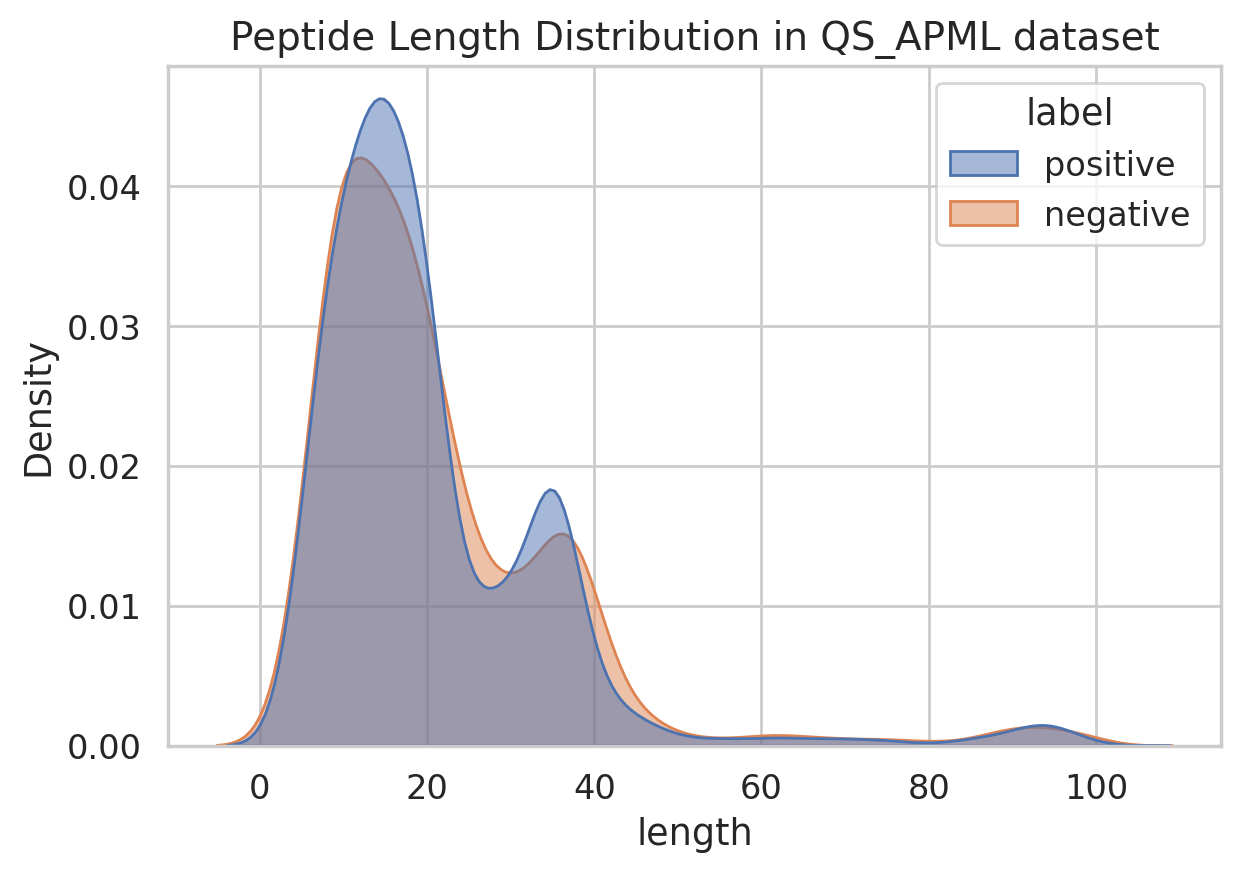

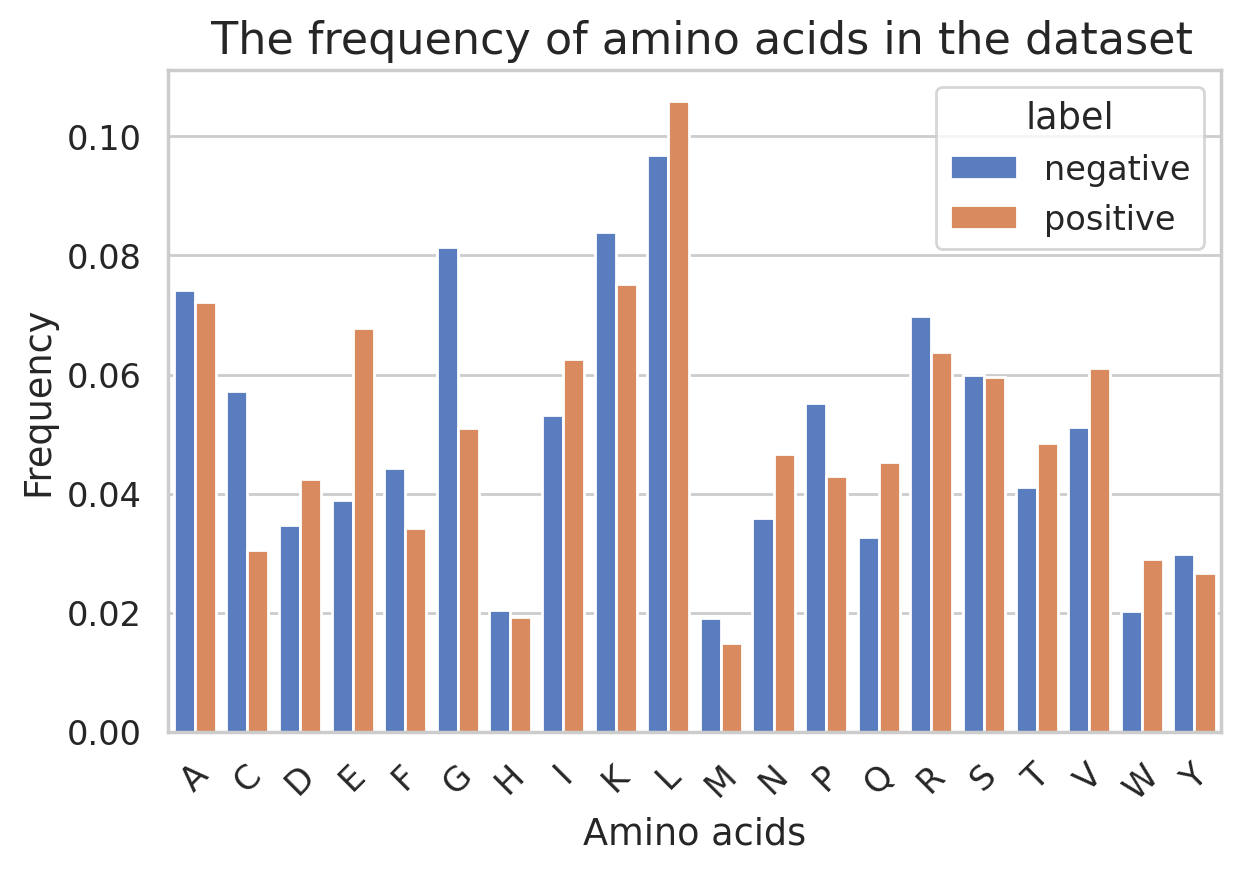

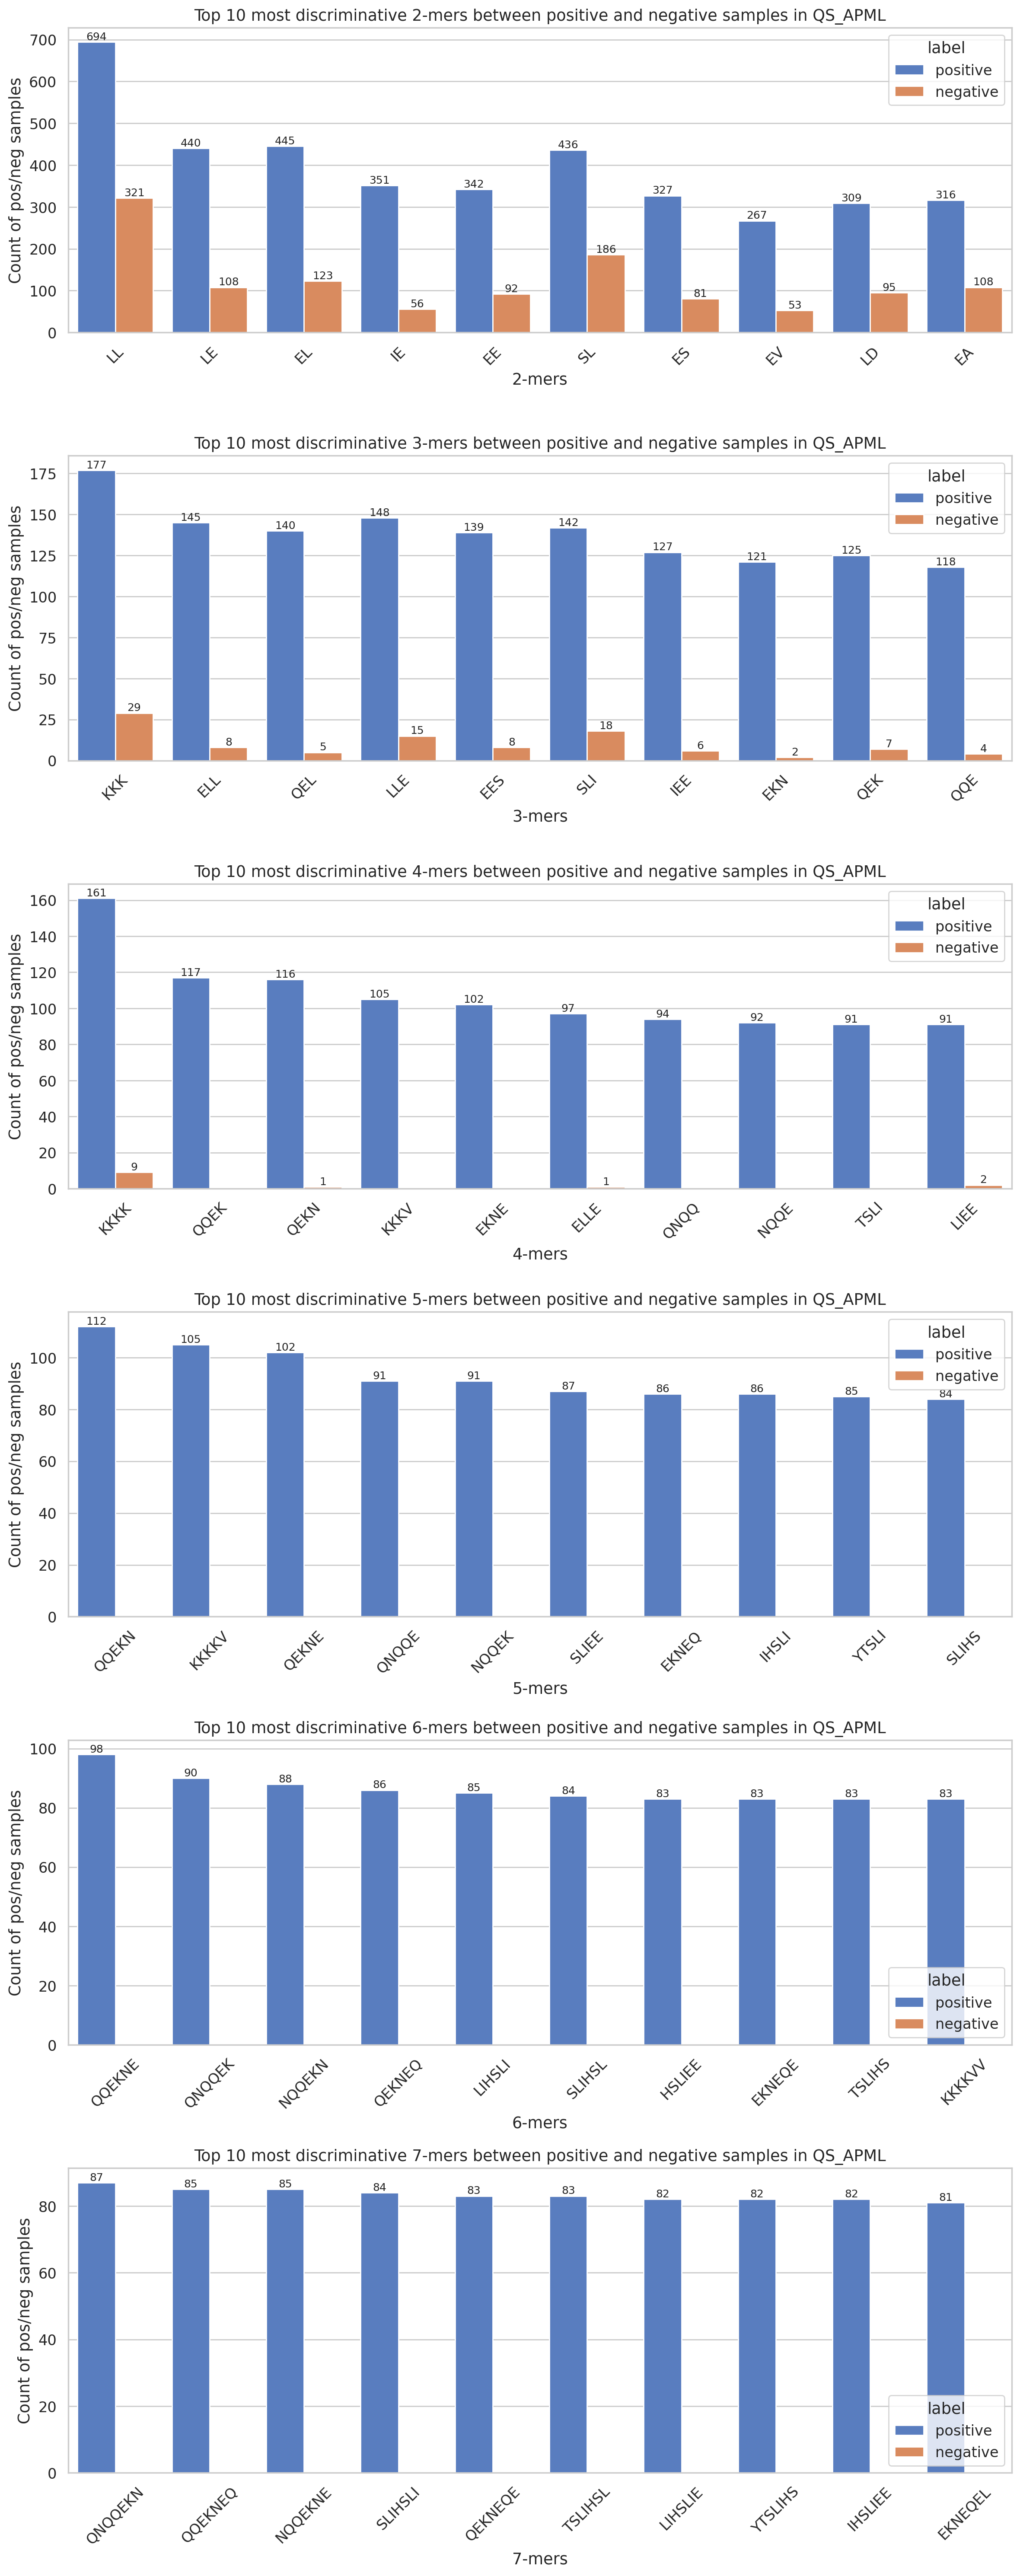

In [24]:
from pepbenchmark.visualization.distribution import plot_peptide_distribution
df = pd.DataFrame({"sequence":fasta, "label":label})
plot_peptide_distribution(df, dataset_name = "QS_APML", type = "binary_classification")

[2025-07-07 05:59:00,388][INFO][pepbenchmark] Feature fasta already loaded, skipping download
[2025-07-07 05:59:00,389][INFO][pepbenchmark] Feature label already loaded, skipping download
[2025-07-07 05:59:00,389][INFO][pepbenchmark] Feature label already loaded, skipping download


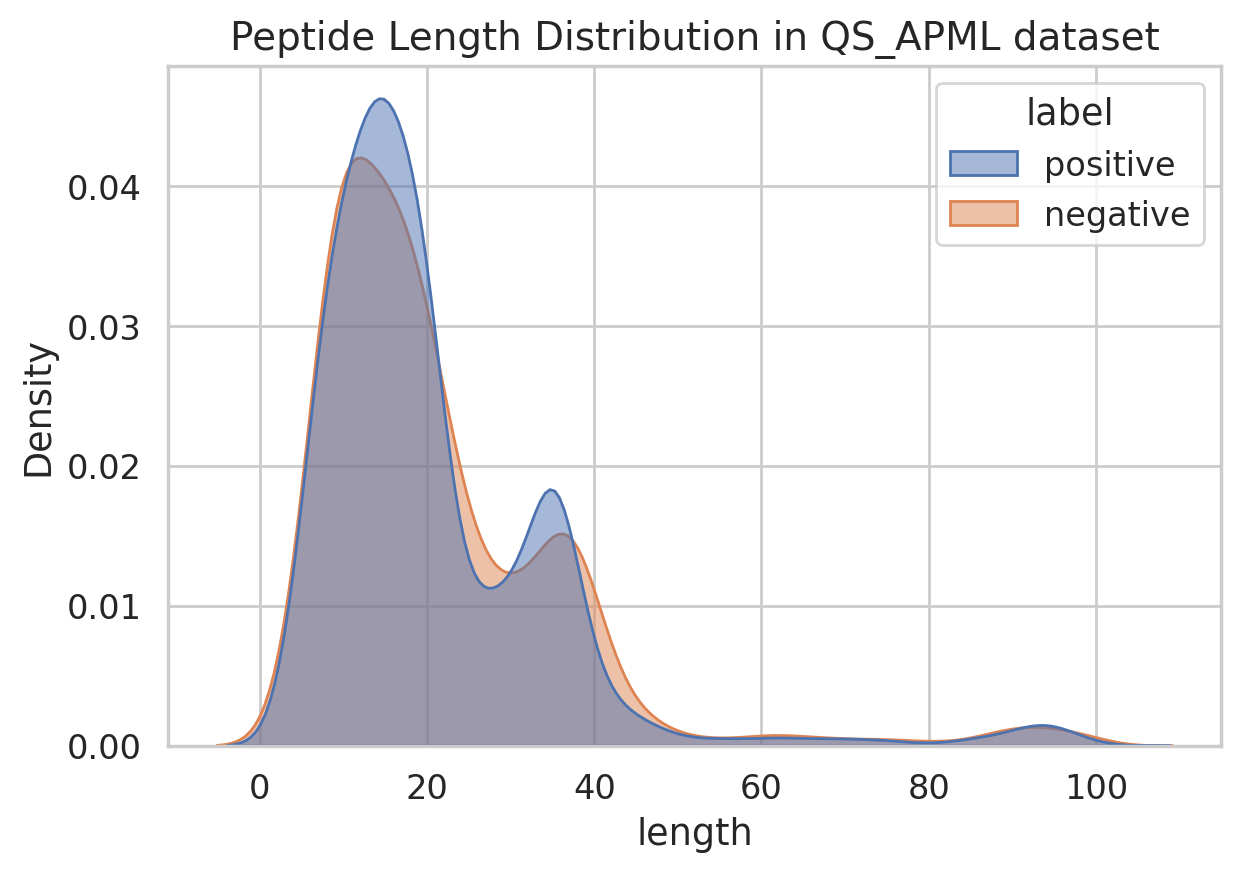

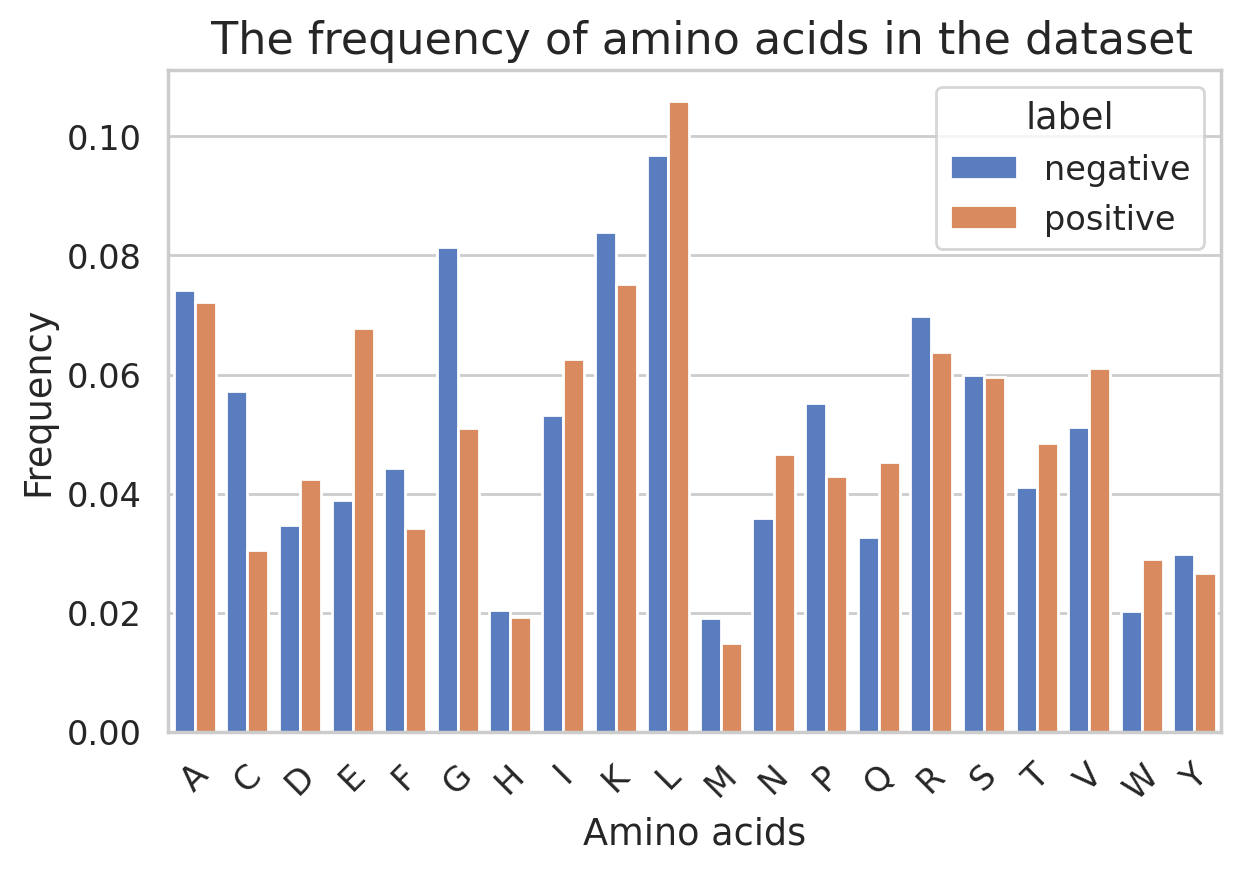

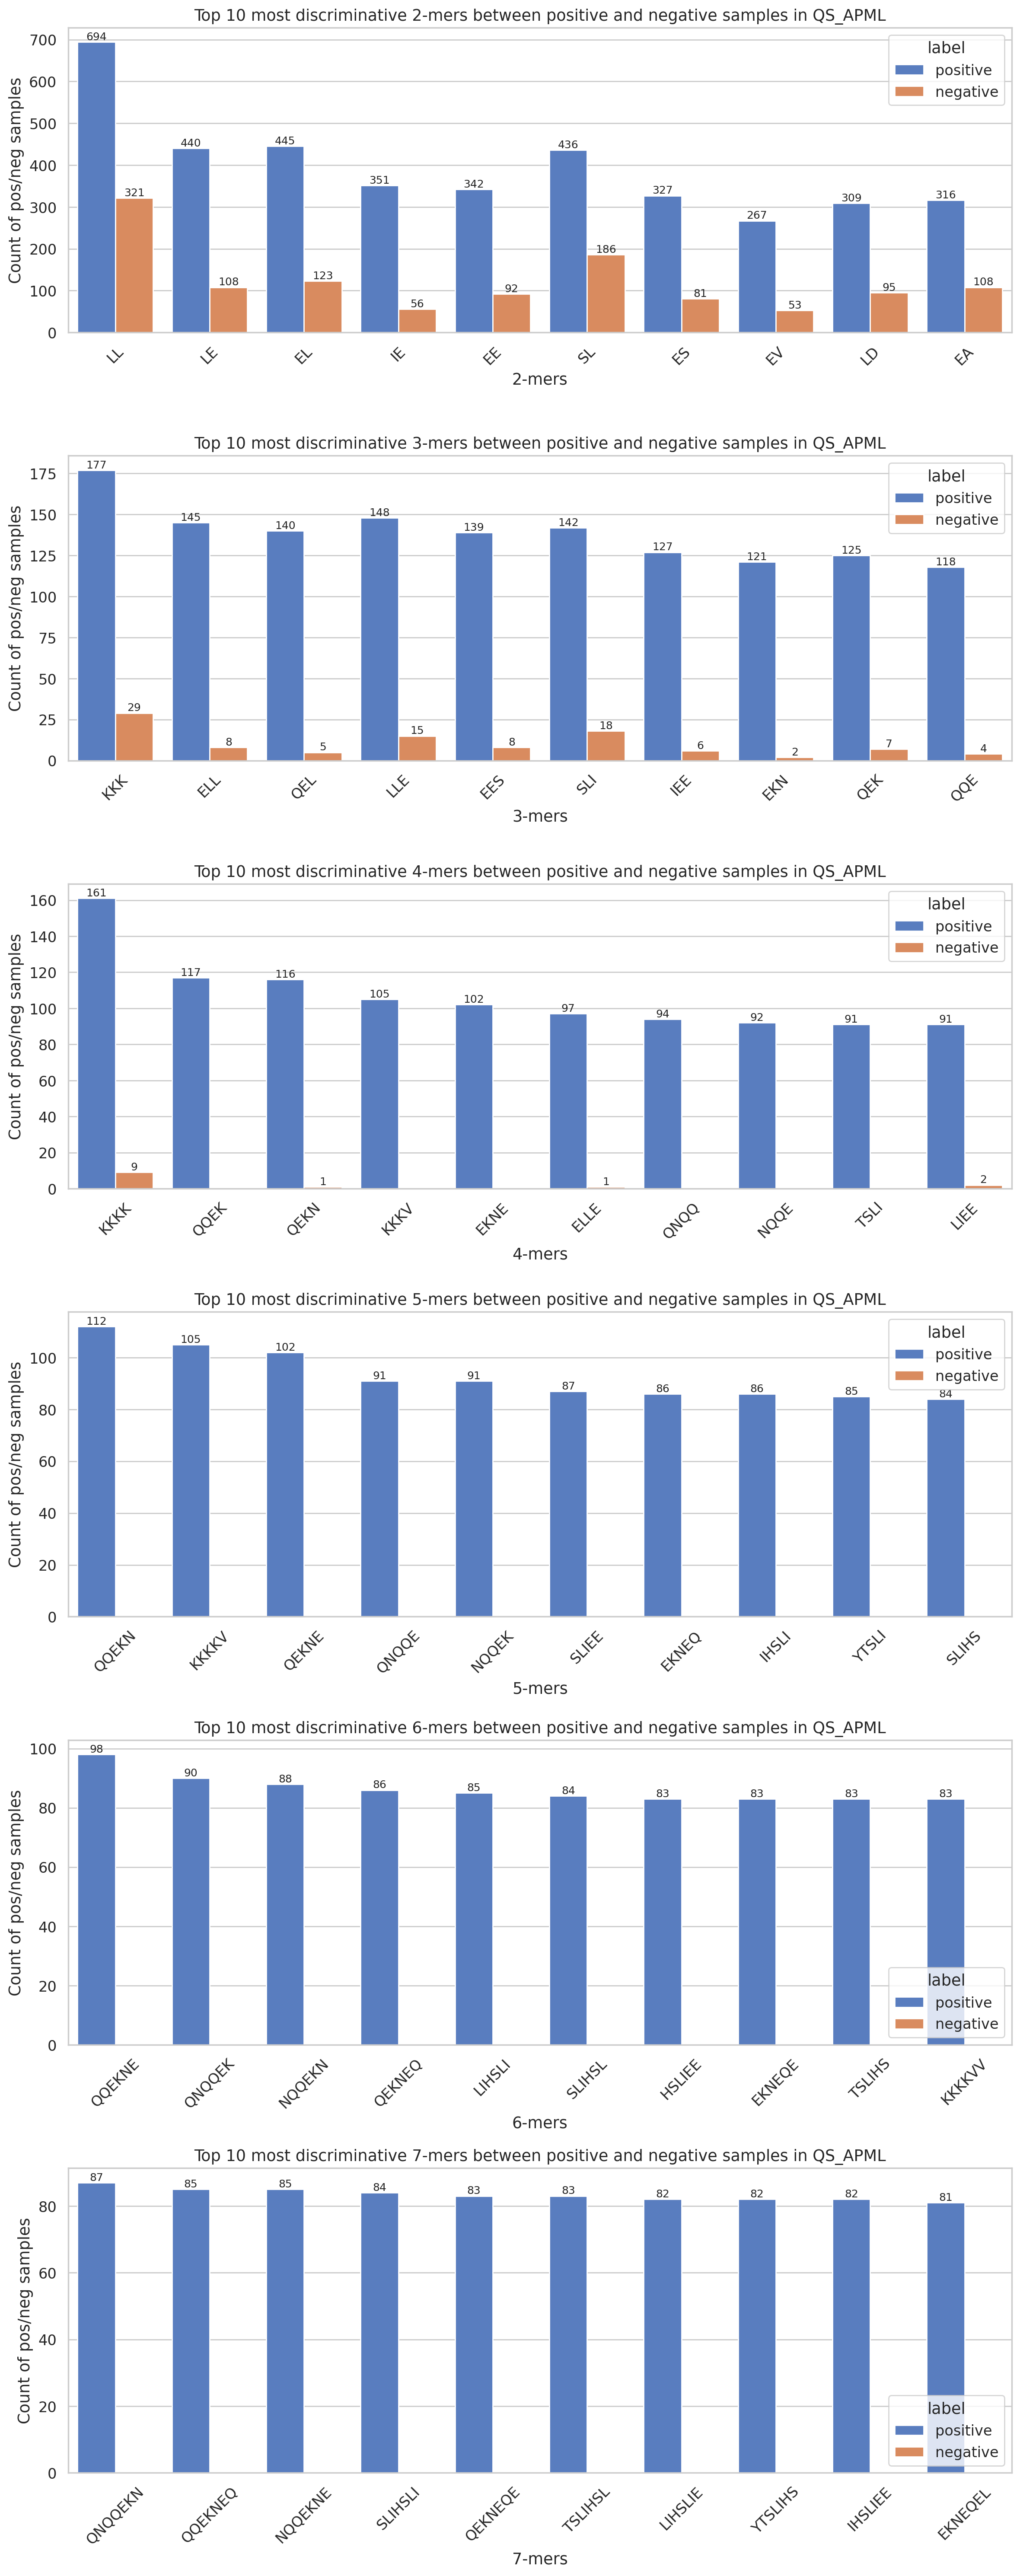

In [25]:
remain_fasta = dataset.get_official_feature("fasta")
remain_label = dataset.get_official_feature("label")
remain_df  = pd.DataFrame({"sequence":remain_fasta, "label":remain_label})
plot_peptide_distribution(remain_df, dataset_name = "QS_APML", type = "binary_classification")